 # BREAST CANCER DATA

In [ ]:
# ZADANIE 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

In [ ]:
print(data_breast_cancer.frame[['mean area', 'mean smoothness', 'target']])

     mean area  mean smoothness  target
0       1001.0          0.11840       0
1       1326.0          0.08474       0
2       1203.0          0.10960       0
3        386.1          0.14250       0
4       1297.0          0.10030       0
..         ...              ...     ...
564     1479.0          0.11100       0
565     1261.0          0.09780       0
566      858.1          0.08455       0
567     1265.0          0.11780       0
568      181.0          0.05263       1

[569 rows x 3 columns]


In [ ]:
print(data_breast_cancer['DESCR'])
print(data_breast_cancer['feature_names'])
print(data_breast_cancer.target_names)
# 'malignant' - złośliwy
# 'benign'    - łagodny

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
from sklearn.model_selection import train_test_split

X_bc = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)
y_bc = pd.Series(data_breast_cancer.target)

# biore pod uwage jedynie cechy: 'mean area' i 'mean smoothness'
X_bc = X_bc[['mean area', 'mean smoothness']]

# print(X_bc.dtypes)
# print(y_bc.dtypes)

In [ ]:
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# bez skalowania
svm_clf_bc = LinearSVC(C=1.0, loss='hinge', random_state=42)
svm_clf_bc.fit(X_bc_train, y_bc_train)


# ze skalowaniem
svm_clf_bc_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1.0, loss="hinge", random_state=42)),
])
svm_clf_bc_scaled.fit(X_bc_train, y_bc_train)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge', random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

train_bc_acc = accuracy_score(y_bc_train, svm_clf_bc.predict(X_bc_train))
test_bc_acc = accuracy_score(y_bc_test, svm_clf_bc.predict(X_bc_test))

train_bc_scaled_acc = accuracy_score(y_bc_train, svm_clf_bc_scaled.predict(X_bc_train))
test_bc_scaled_acc = accuracy_score(y_bc_test, svm_clf_bc_scaled.predict(X_bc_test))

bc_acc_list = [train_bc_acc, test_bc_acc, train_bc_scaled_acc, test_bc_scaled_acc]
print(bc_acc_list)
# [0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]
# skalowanie dalo zdecydowanie lepsze resultaty accuracy


[0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]


In [ ]:
import pickle

with open('bc_acc.pkl', 'wb') as file:
  pickle.dump(bc_acc_list, file)

# IRIS DATA

In [ ]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])
print(data_iris['target_names'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# eksperyment dla zbioru irysow wykrywajacy czy dany przypadek jest gatunku Virginica
# na podstawie cech: dlugosc i szerokosc platka
# 0: sepal length
# 1: sepal width
# 2: petal length
# 3: petal widt

X_iris = data_iris['data'].iloc[:, [2,3]] # dlugosc i szerokosc platka, iloc bo ja juz mam to jako dataframe
y_iris = (data_iris['target'] == 2).astype(np.int8) # 2 to iris virginica

# print(X_iris.loc[[0,1,2]])
# print(y_iris.loc[[0,1,2]])

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [ ]:
# bez skalowania
svm_iris_clf = LinearSVC(C=1.0, loss='hinge', random_state=42)
svm_iris_clf.fit(X_iris_train, y_iris_train)

# z skalowaniem
svm_iris_clf_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1.0, loss='hinge', random_state=42)),
])

svm_iris_clf_scaled.fit(X_iris_train, y_iris_train)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge', random_state=42))])

In [ ]:
train_iris_acc = accuracy_score(y_iris_train, svm_iris_clf.predict(X_iris_train))
test_iris_acc = accuracy_score(y_iris_test, svm_iris_clf.predict(X_iris_test))
train_iris_acc_scaled = accuracy_score(y_iris_train, svm_iris_clf_scaled.predict(X_iris_train))
test_iris_acc_scaled = accuracy_score(y_iris_test, svm_iris_clf_scaled.predict(X_iris_test))

iris_acc_list = [train_iris_acc, test_iris_acc, train_iris_acc_scaled, test_iris_acc_scaled]
print(iris_acc_list)
# [0.9416666666666667, 1.0, 0.9416666666666667, 1.0]
# zarowno bez jak i z skalowaniem mamy zadziwiajaco, podejrzanie dobre accuracy (takie samo bez i z skalowaniem),
# wynika to pewnie z faktu, ze zbior danych jest maly (150 probek)

[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]


In [ ]:
with open('iris_acc.pkl', 'wb') as file:
  pickle.dump(iris_acc_list, file)

# Regresja liniowa SVM


<Axes: xlabel='x', ylabel='y'>

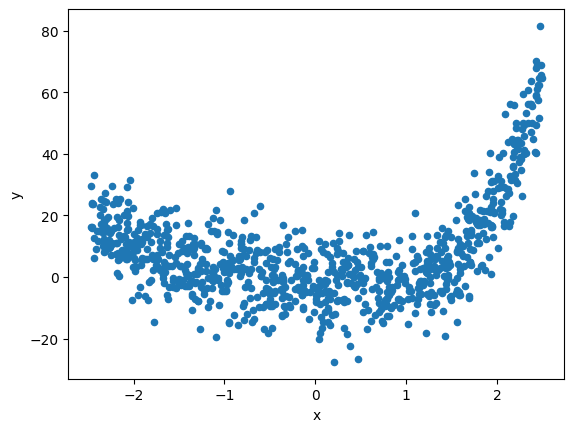

In [ ]:
# ZADANIE 4
size = 900
X = np.random.rand(size)*5 - 2.5
w4, w3, w2, w1, w0 = 1, 2 , 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=42)
# print(X_train)
# print(y_train)

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures

svm_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('linear_svr', LinearSVR()),
])

svm_reg.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_svr', LinearSVR())])

64.97684764634711 73.5324307380107


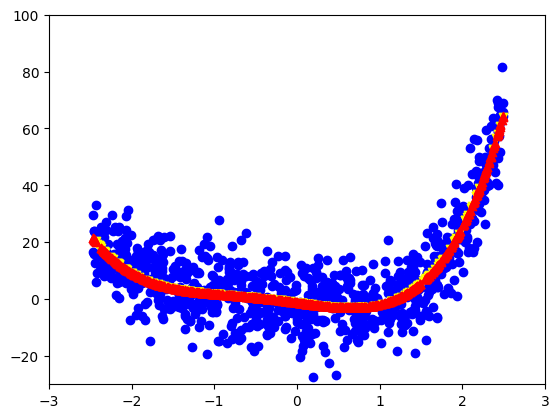

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, svm_reg.predict(X_train))
mse_test = mean_squared_error(y_test, svm_reg.predict(X_test))

print(mse_train, mse_test)
# 60.67299812148146 67.54348540812032
# rzeczywiscie podobne wyniki do do algorytmow KNN oraz LinearReggresion dla wielomianow

plt.scatter(X, y, color='blue')
plt.scatter(X_test, svm_reg.predict(X_test), color="yellow", marker='v')
plt.scatter(X_train, svm_reg.predict(X_train), color="red", marker='^')
plt.xlim(-3,3)
plt.ylim(-30, 100)
plt.show()

In [ ]:
# SVR z kernelem poly 4 stopnia

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=4)
svm_poly_reg.fit(X_train, y_train)

mse_train_poly = mean_squared_error(y_train, svm_poly_reg.predict(X_train))
mse_test_poly = mean_squared_error(y_test, svm_poly_reg.predict(X_test))

print(mse_train_poly, mse_test_poly)
# 105.25837856194626 117.39833119803865
# zdecydowanie wieksze (gorsze) wyniki mse co moze byc wynikiem zle dobranych parametrow

110.0693072280209 120.34069043038237


In [ ]:
# szukanie najlepszych parametrow coef0 i C

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1, 1, 10],       # C - parametr regularyzacji, wysokie = model przykleja sie do danych, niskie = model bardziej ogolny
    'coef0' : [0.1, 1, 10]    # coef0 - parametr stosowany w funckjach jadrowych (dodaje stala wartosc do obliczen)
}

svr_poly = SVR(kernel='poly', degree=4)

search = GridSearchCV(svr_poly,
                      param_grid,
                      scoring='neg_mean_squared_error',  # w GridSearchCV ocena jest maksymalizowana wiec tu musi byc ujemna
                      n_jobs=-1)
search.fit(X.reshape(-1,1), y)


GridSearchCV(estimator=SVR(degree=4, kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'Best negative mean squared error = {search.best_score_}')
print(search.best_params_)
# Best negative mean squared error = -62.59189445816537
# {'C': 10, 'coef0': 1}

Best negative mean squared error = -67.59180159752299
{'C': 10, 'coef0': 10}


In [ ]:
# SVR dla wyliczonych optymalnych parametrow

svr_poly_opt = SVR(kernel='poly', degree=4, C=10, coef0=1)
svr_poly_opt.fit(X_train, y_train)

train_mse_opt = mean_squared_error(y_train, svr_poly_opt.predict(X_train))
test_mse_opt = mean_squared_error(y_test, svr_poly_opt.predict(X_test))

print(train_mse_opt, test_mse_opt)
# 60.55587168191989 67.42649268003711
# zdecydowanie lepsze

64.96173576530715 73.79432429739721


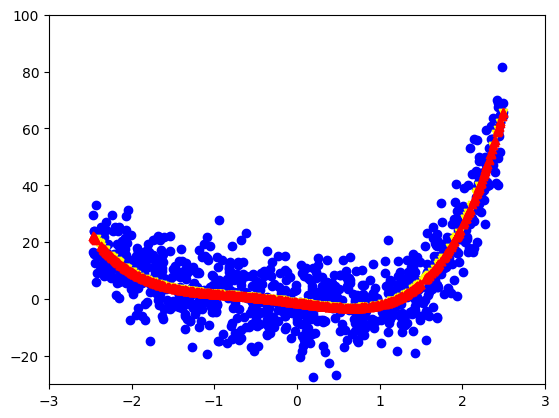

In [ ]:
plt.scatter(X, y, color='blue')
plt.scatter(X_test, svr_poly_opt.predict(X_test), color="yellow", marker='v')
plt.scatter(X_train, svr_poly_opt.predict(X_train), color="red", marker='^')
plt.xlim(-3,3)
plt.ylim(-30, 100)
plt.show()

In [ ]:
reg_mse_list = [mse_train, mse_test, train_mse_opt, test_mse_opt]
print(reg_mse_list)
# [60.67299812148146, 67.54348540812032, 60.55587168191989, 67.42649268003711]

[64.97684764634711, 73.5324307380107, 64.96173576530715, 73.79432429739721]


In [ ]:
with open('reg_mse.pkl', 'wb') as file:
  pickle.dump(reg_mse_list, file)